In [53]:
import os 
import sys
sys.path.append(os.path.join(".."))
from utils.imutils import jimshow, jimshow_channel
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

__Read Image__

In [54]:
fname = str(Path.cwd().parent / "data" / "img" / "coins.png")
fname

'c:\\Users\\z6hjb\\OneDrive - KMD\\projects\\UNI\\visual_analytics_cds\\data\\img\\coins.png'

In [55]:
image = cv2.imread(fname)

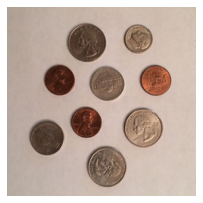

In [56]:
jimshow(image)

In [57]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

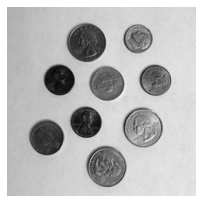

In [58]:
jimshow_channel(grey_image)

In [59]:
sobelX = cv2.Sobel(grey_image, cv2.CV_64F, 1, 0)  # horizontal kernel
sobelY = cv2.Sobel(grey_image, cv2.CV_64F, 0, 1)  # verical kernel

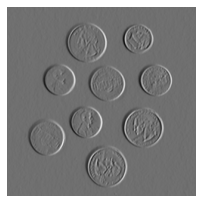

In [60]:
jimshow_channel(sobelX)

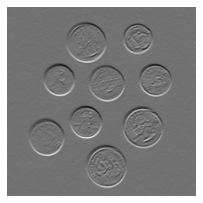

In [61]:
jimshow_channel(sobelY)

In [62]:
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

In [63]:
sobel_edges = np.hstack([sobelX, sobelY])

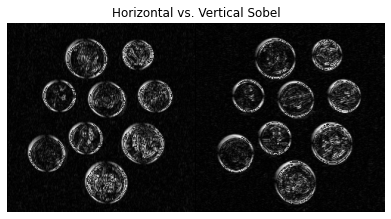

In [64]:
jimshow_channel(sobel_edges, "Horizontal vs. Vertical Sobel")

## Combined Sobel

In [65]:
sobel_combined = cv2.bitwise_or(sobelX, sobelY)

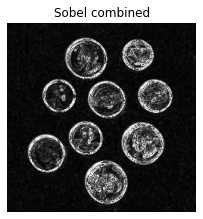

In [66]:
jimshow_channel(sobel_combined, "Sobel combined")

## Laplacian

In [67]:
laplace = cv2.Laplacian(grey_image, cv2.CV_64F)

In [68]:
laplace = np.uint8(np.absolute(laplace))

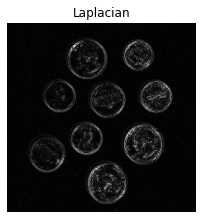

In [69]:
jimshow_channel(laplace, "Laplacian")

## Canny edge detection

In [71]:
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)

In [76]:
canny = cv2.Canny(blurred, 30, 150)

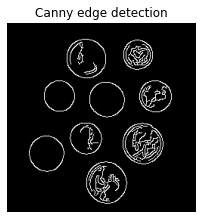

In [78]:
jimshow_channel(canny, "Canny edge detection")

## Find Contours

In [83]:
(contours, _) = cv2.findContours(canny.copy(),
                cv2.RETR_EXTERNAL,
                cv2.CHAIN_APPROX_SIMPLE)

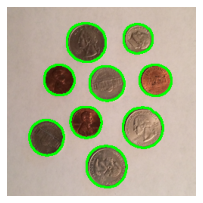

In [85]:
jimshow(cv2.drawContours(image.copy(), # Draw contours on original
                        contours,      # Our list of contours 
                        -1,            # Which contours to draw
                        (0,255,0),     # Contour color
                        2))            # Contour pixel width

In [86]:
type(contours)

list

In [87]:
len(contours)

9

In [90]:
print(f"I can count {len(contours)} in the image!")

I can count 9 in the image!
